<a href="https://colab.research.google.com/github/andoanminhkhanh/trituenhantao/blob/main/Test_train84_CNN_GRAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [54]:
from imutils import paths
imgTest = list(paths.list_images("/content/drive/MyDrive/AI FINAL/test"))

In [55]:
X_test = []
y_test = []

In [56]:
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ở định dạng xám

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.resize(img1, (150, 150))  # Resize ảnh xám

    # Thêm vào dữ liệu data và label
    X_test.append(img1)
    y_test.append(Y_test)

In [57]:
lb = LabelBinarizer()
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [58]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AI FINAL/CNN_GRAY.h5')

In [59]:
y_pred = loaded_model.predict(X_test)

28/28 [==============================] - 7s 250ms/step


In [60]:
y_pred

array([[3.0119520e-06, 9.9999696e-01],
       [5.6642169e-23, 9.9999994e-01],
       [1.2025760e-10, 9.9999994e-01],
       ...,
       [9.9971789e-01, 2.8208786e-04],
       [9.9942398e-01, 5.7609106e-04],
       [9.9999309e-01, 6.9595749e-06]], dtype=float32)

In [61]:
max_indices = np.argmax(y_pred, axis=1)

In [62]:
y_pred_new = np.zeros_like(max_indices)
y_pred_new[max_indices == 1] = 1
y_pred_new[max_indices == 2] = 2

In [63]:
y_pred_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [64]:
y_test_new = np.array(y_test).reshape(-1)

# In kết quả
print(y_test_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

##**KIỂM THỬ HÌNH ẢNH CỤ THỂ**

In [65]:
labels = ['Bình thường', 'Viêm phổi']

In [66]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 458ms/step
[[3.028794e-10 1.000000e+00]]
- Bình thường:  0.0 %
- Viêm phổi:  100.0 %
--> Nhãn dự đoán:  Viêm phổi


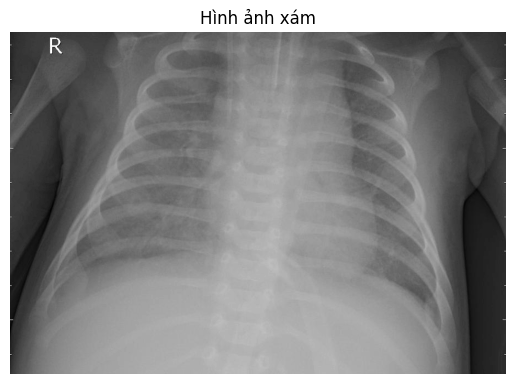

In [67]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread('/content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person1019_bacteria_2950.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Đổi kích thước ảnh xám về 150x150
img_resize = cv2.resize(img_gray, (150, 150))

# Thêm một chiều để khớp với đầu vào của mô hình và chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0
img_resize = np.expand_dims(img_resize, axis=-1)  # Thêm chiều kênh
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Tải mô hình đã huấn luyện (thay 'loaded_model' bằng tên mô hình của bạn)
model_path = "/content/drive/MyDrive/AI FINAL/CNN_GRAY.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

# Hiển thị hình ảnh xám
plt.imshow(img_gray, cmap='gray')
plt.title("Hình ảnh xám")
plt.axis('off')
plt.show()

##**MA TRẬN NHẦM LẪN**

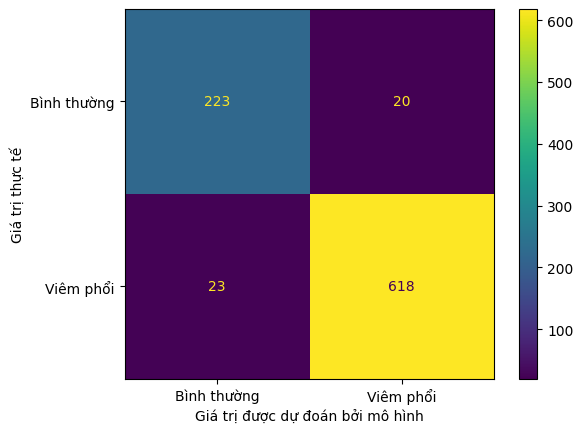

In [68]:
# Ma trận nhầm lẫn dạng đồ thị
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matran = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_new, y_pred_new), display_labels = ['Bình thường', 'Viêm phổi'])
matran.plot()
plt.xlabel('Giá trị được dự đoán bởi mô hình')
plt.ylabel('Giá trị thực tế')
plt.show()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Giả sử y_test_new và y_pred_new đã được định nghĩa ở đâu đó
# y_test_new = ...
# y_pred_new = ...

# Tính và hiển thị classification report
report = classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi'], output_dict=True)
print("Classification Report:\n", classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi']))

# Lấy macro-averaged F1-score
macro_f1 = report['macro avg']['f1-score']
print("Macro-averaged F1-score:", macro_f1)

# Tính micro-averaged F1-score
micro_f1 = f1_score(y_test_new, y_pred_new, average='micro')
print("Micro-averaged F1-score:", micro_f1)

# Tính weighted-averaged F1-score
weighted_f1 = f1_score(y_test_new, y_pred_new, average='weighted')
print("Weighted-averaged F1-score:", weighted_f1)

Classification Report:
               precision    recall  f1-score   support

 Bình thường       0.91      0.92      0.91       243
   Viêm phổi       0.97      0.96      0.97       641

    accuracy                           0.95       884
   macro avg       0.94      0.94      0.94       884
weighted avg       0.95      0.95      0.95       884

Macro-averaged F1-score: 0.9392227120177925
Micro-averaged F1-score: 0.9513574660633484
Weighted-averaged F1-score: 0.951449628752302


In [70]:
# Lấy các chỉ số Precision, Recall, và F1-score cho từng lớp
precision_normal = report['Bình thường']['precision']
recall_normal = report['Bình thường']['recall']
f1_normal = report['Bình thường']['f1-score']

precision_pneumonia = report['Viêm phổi']['precision']
recall_pneumonia = report['Viêm phổi']['recall']
f1_pneumonia = report['Viêm phổi']['f1-score']

# Lấy macro-averaged Precision, Recall, và F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# In ra các chỉ số
print("Chỉ số Precision, Recall, và F1-score cho từng lớp:")
print(f"Bình thường: Precision={precision_normal}, Recall={recall_normal}, F1-score={f1_normal}")
print(f"Viêm phổi: Precision={precision_pneumonia}, Recall={recall_pneumonia}, F1-score={f1_pneumonia}")

print("\nChỉ số macro-averaged Precision, Recall, và F1-score:")
print(f"Macro-averaged Precision={macro_precision}")
print(f"Macro-averaged Recall={macro_recall}")
print(f"Macro-averaged F1-score={macro_f1}")

Chỉ số Precision, Recall, và F1-score cho từng lớp:
Bình thường: Precision=0.9065040650406504, Recall=0.9176954732510288, F1-score=0.9120654396728016
Viêm phổi: Precision=0.9686520376175548, Recall=0.9641185647425897, F1-score=0.9663799843627835

Chỉ số macro-averaged Precision, Recall, và F1-score:
Macro-averaged Precision=0.9375780513291025
Macro-averaged Recall=0.9409070189968093
Macro-averaged F1-score=0.9392227120177925


In [71]:
set(y_test_new)

{0, 1}

In [72]:
set(y_pred_new)

{0, 1}

In [73]:
max_indices1 = np.argmax(y_test, axis=1)
y_test_new = np.zeros_like(max_indices1)
y_test_new[max_indices1 == 1] = 1
y_test_new[max_indices1 == 2] = 2

In [74]:
y_test_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
# Giả sử y_test và y_pred là các mảng chứa nhãn thực tế và dự đoán
# imgTest là danh sách các đường dẫn đến hình ảnh

for i in range(len(imgTest)):
    if y_test_new[i] == 0 and y_pred_new[i] == 1:
        print(f"Đường dẫn của hình ảnh thỏa mãn: {imgTest[i]}")

Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person282_virus_579.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person1220_bacteria_3174.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person371_bacteria_1701.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person161_bacteria_759.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person1273_bacteria_3233.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person298_bacteria_1413.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person530_bacteria_2233.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person1678_bacteria_4446.jpeg
Đường dẫn của hình ảnh thỏa mãn: /content/drive/MyDrive/AI FINAL/test/PNEUMONIA/person44_virus_93.jpeg
Đường dẫn của hình ảnh thỏa